In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 

In [31]:
dataset = pd.read_csv('DATAINDOv2.csv')  
#dataset = pd.read_csv('DATAINDOv3.csv') # memuattanggal
dataset.head()  
dataset.describe()  


,konfirmasi,sembuh,Meninggal,Totalkonfirmed
count,21.000000,21.000000,21.000000,21.000000
mean,49.619048,12.047619,22.047619,315.380952
std,42.530549,15.292077,29.037004,320.044134
min,2.000000,0.000000,0.000000,2.000000
25%,13.000000,0.000000,0.000000,44.000000
50%,38.000000,2.000000,1.000000,182.000000
75%,65.000000,29.000000,48.000000,514.000000
max,157.000000,46.000000,87.000000,1046.000000


In [32]:
X= dataset.drop('Totalkonfirmed', axis=1) 

In [33]:
X

,konfirmasi,sembuh,Meninggal
0,2.0,0.0,0.0
1,2.0,0.0,0.0
2,13.0,0.0,1.0
3,8.0,0.0,0.0
4,9.0,0.0,0.0
5,10.0,0.0,0.0
6,35.0,0.0,0.0
7,27.0,0.0,0.0
8,21.0,0.0,0.0
9,17.0,0.0,0.0


In [34]:
y = dataset['Totalkonfirmed'] 

In [35]:
y

0        2.0
1        4.0
2       17.0
3       25.0
4       34.0
5       44.0
6       79.0
7      106.0
8      127.0
9      144.0
10     182.0
11     237.0
12     319.0
13     369.0
14     450.0
15     514.0
16     579.0
17     676.0
18     780.0
19     889.0
20    1046.0
Name: Totalkonfirmed, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)  

In [38]:
# Pada bagian ini kita menggunakan scikit-learn dengan DecisionTreeClassifier
# Untuk mencocokkan model gunakan data latih dengan fungsi fit sbb 

from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)  
# Untuk membuat prediksi pada data uji, gunakan metode(fungsi) predict
y_pred = regressor.predict(X_test)  
#Membandingkan data aktual dan hasil model/dugaan
df=pd.DataFrame({'Data aktual':y_test, 'Dugaan':y_pred})  
df    

,Data aktual,Dugaan
8,127.0,144.0
13,369.0,319.0
20,1046.0,676.0
1,4.0,2.0
11,237.0,319.0
10,182.0,106.0
14,450.0,514.0
18,780.0,676.0
6,79.0,106.0
19,889.0,676.0


In [39]:
from sklearn import metrics  
print('Rata-rata Error absolut:', metrics.mean_absolute_error(y_test, y_pred))  
print('Rata-rata Error kuadrat:', metrics.mean_squared_error(y_test, y_pred))  
print('Akar Rata-rata Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  



Rata-rata Error absolut: 92.18181818181819
Rata-rata Error kuadrat: 19389.454545454544
Akar Rata-rata Error: 139.24602165036725


In [40]:
Indo_kasus = []
total_mati = [] 
lajukematian = []

In [41]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

Indo_daily_increase = daily_increase(Indo_kasus)

In [42]:
harihari_sejak_Mar_06 = np.array([i for i in range(len(y))]).reshape(-1, 1)
#Indo_kasus = np.array(Indo_kasus).reshape(-1, 1)
Indo_kasus =y;

In [44]:
harihari_sejak_Mar_06

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20]])

In [45]:
harimendatang = 10
future_forcast = np.array([i for i in range(len(y)+harimendatang)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [49]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(harihari_sejak_Mar_06, Indo_kasus, test_size=0.15, shuffle=False) 

In [58]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=6, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 524.7394481755621
MSE: 279905.0759180483


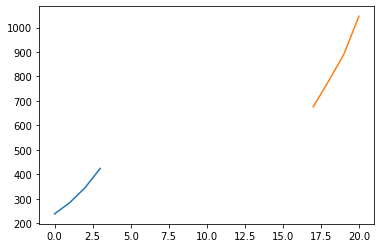

In [59]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [60]:
start = '3/06/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [61]:
# Future predictions using SVM 
print('pendekatan SVM mendatang')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

pendekatan SVM mendatang


{('03/27/2020', 526.0),
 ('03/28/2020', 654.0),
 ('03/29/2020', 816.0),
 ('03/30/2020', 1017.0),
 ('03/31/2020', 1264.0),
 ('04/01/2020', 1566.0),
 ('04/02/2020', 1932.0),
 ('04/03/2020', 2373.0),
 ('04/04/2020', 2899.0),
 ('04/05/2020', 3525.0)}

In [63]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [64]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 309.1667113171941
MSE: 146176.73792585736


In [65]:
print(linear_model.coef_)

[ 3.94117647e+00 -8.64310352e+00  8.82328630e+00 -1.57973873e+00
  1.34015043e-01 -3.67994364e-03]


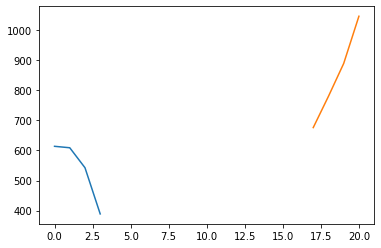

In [67]:
plt.plot(test_linear_pred)
plt.plot(y_test_confirmed)

In [68]:
# bayesian ridge polynomial regression
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   16.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           compute_score=False, copy_X=True,
                                           fit_intercept=False, lambda_1=1e-06,
                                           lambda_2=1e-06, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'lambda_2': [1e

In [69]:
bayesian_search.best_params_

{'tol': 0.01,
 'lambda_2': 0.0001,
 'lambda_1': 0.0001,
 'alpha_2': 1e-06,
 'alpha_1': 1e-07}

In [70]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 37.65002302605936
MSE: 2323.461495478045


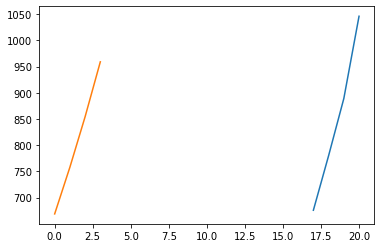

In [71]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)

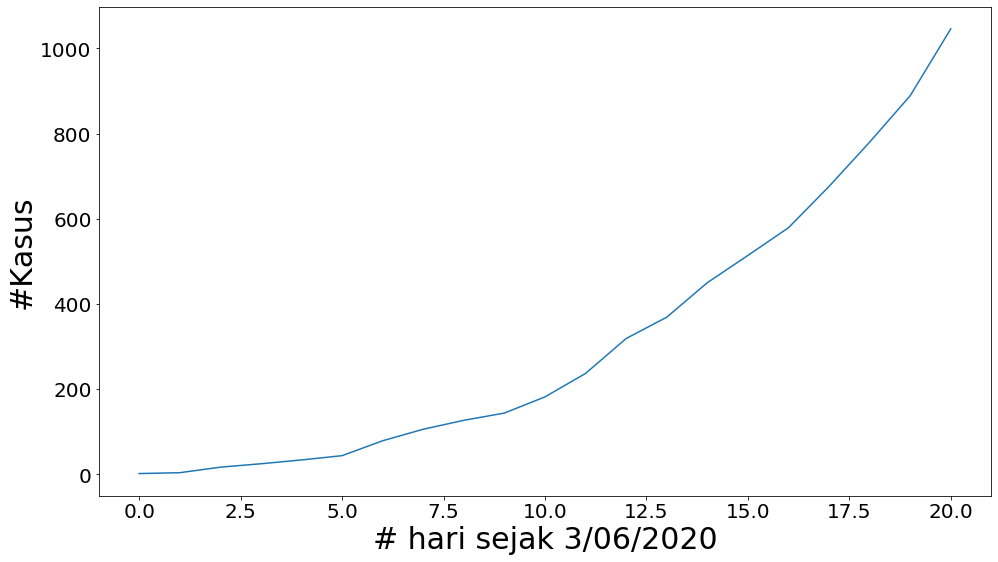

In [72]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, Indo_kasus)
#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('# hari sejak 3/06/2020', size=30)
plt.ylabel('#Kasus', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

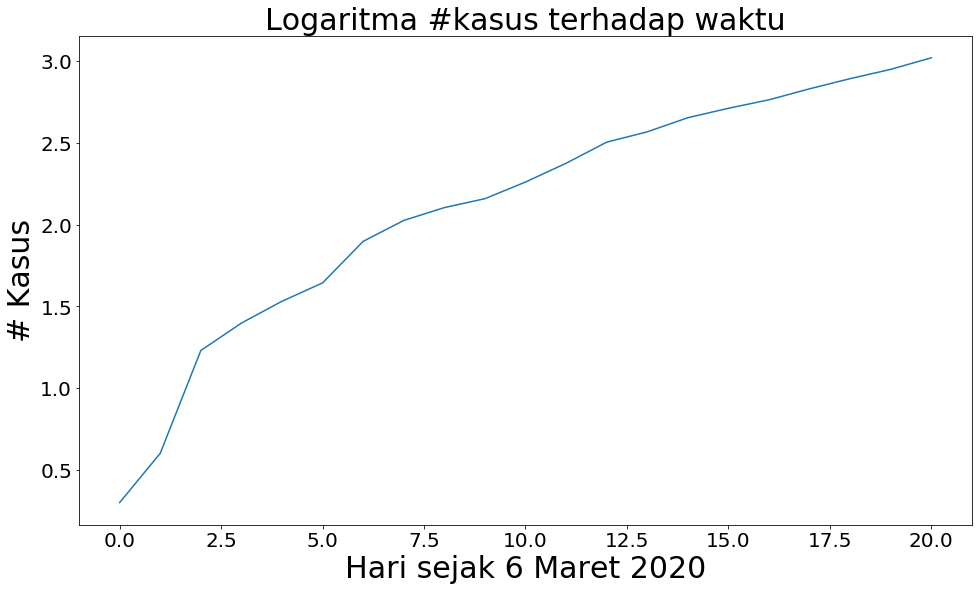

In [73]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(Indo_kasus))
plt.title('Logaritma #kasus terhadap waktu', size=30)
plt.xlabel('Hari sejak 6 Maret 2020', size=30)
plt.ylabel('# Kasus', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

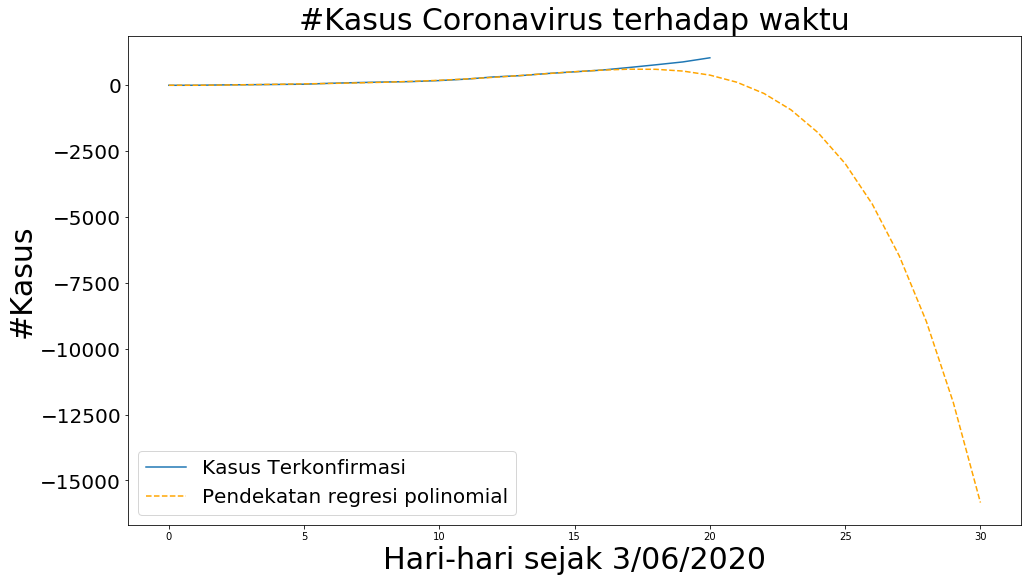

In [75]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, Indo_kasus)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('#Kasus Coronavirus terhadap waktu', size=30)
plt.xlabel('Hari-hari sejak 3/06/2020', size=30)
plt.ylabel('#Kasus', size=30)
plt.legend(['Kasus Terkonfirmasi', 'Pendekatan regresi polinomial'],prop={'size': 20}) 
plt.yticks(size=20)
plt.show()

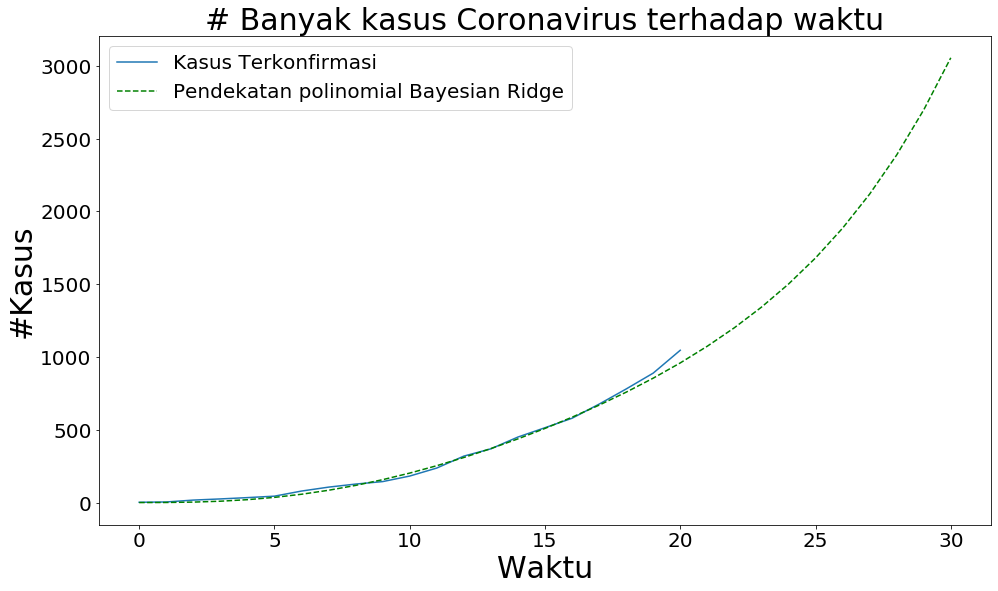

In [76]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, Indo_kasus)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='green')
plt.title('# Banyak kasus Coronavirus terhadap waktu', size=30)
plt.xlabel('Waktu',size=30)
plt.ylabel('#Kasus', size=30)
plt.legend(['Kasus Terkonfirmasi', 'Pendekatan polinomial Bayesian Ridge'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

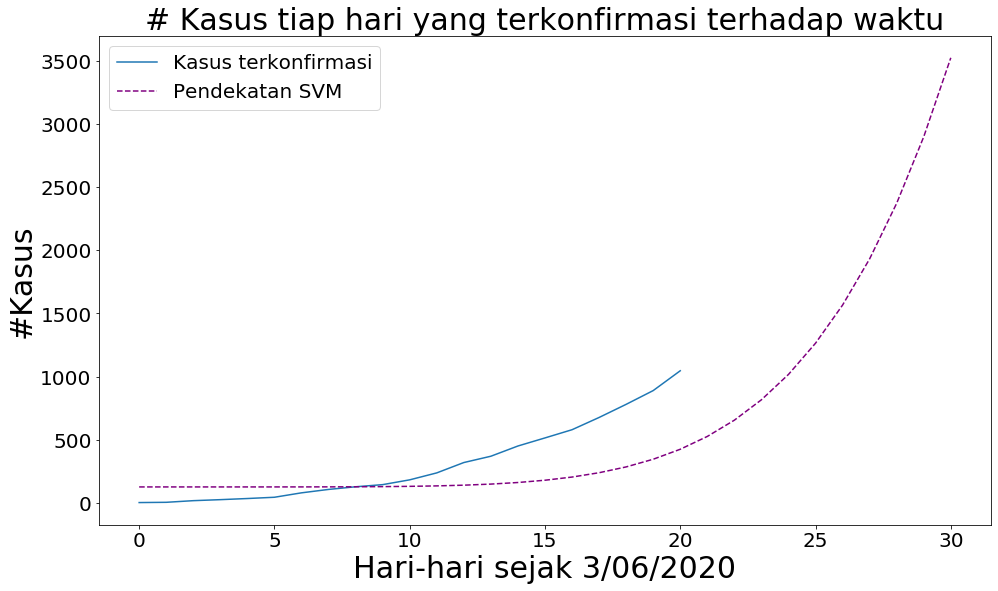

In [77]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, Indo_kasus)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# Kasus tiap hari yang terkonfirmasi terhadap waktu', size=30)
plt.xlabel('Hari-hari sejak 3/06/2020', size=30)
plt.ylabel('#Kasus', size=30)
plt.legend(['Kasus terkonfirmasi', 'Pendekatan SVM'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

MEMPELAJARI YANG MENINGGAL

In [125]:
total_kematian = [] 

In [126]:
y2 = dataset['Meninggal']

In [127]:
Indo_kasus =y2;

In [128]:
y2

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     1.0
11    12.0
12     7.0
13    32.0
14    38.0
15    48.0
16    49.0
17    55.0
18    55.0
19    78.0
20    87.0
Name: Meninggal, dtype: float64

In [129]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(harihari_sejak_Mar_06, Indo_kasus, test_size=0.15, shuffle=False) 

In [130]:
# bayesian ridge polynomial regression
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           compute_score=False, copy_X=True,
                                           fit_intercept=False, lambda_1=1e-06,
                                           lambda_2=1e-06, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'lambda_2': [1e

In [131]:
bayesian_search.best_params_

{'tol': 0.0001,
 'lambda_2': 1e-07,
 'lambda_1': 0.0001,
 'alpha_2': 1e-05,
 'alpha_1': 1e-07}

In [133]:
harimendatang = 10
future_forcast = np.array([i for i in range(len(y)+harimendatang)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [134]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [135]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 49.38924762939321
MSE: 2847.7795405262204


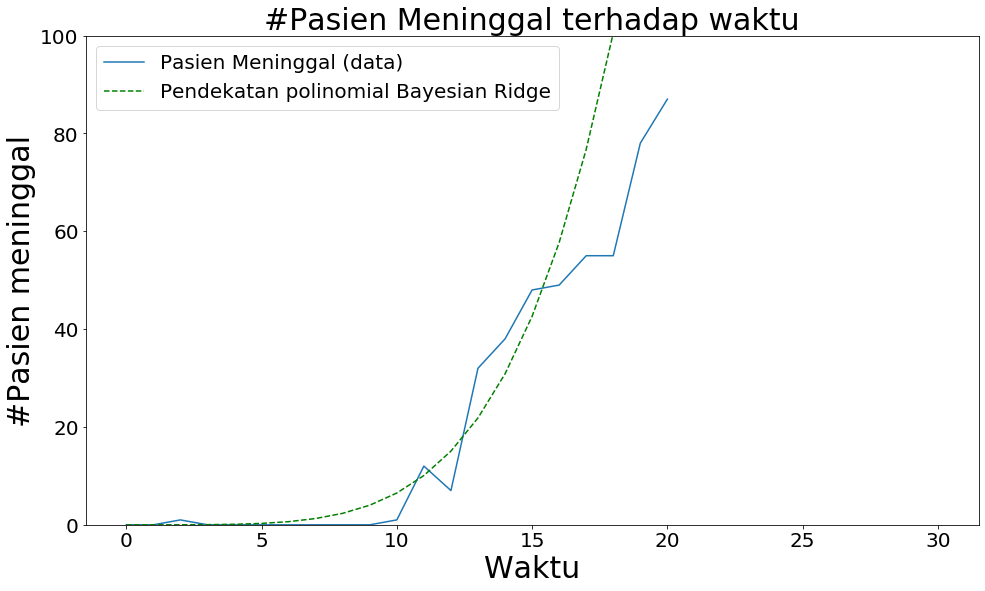

In [136]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, Indo_kasus)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='green')
plt.title('#Pasien Meninggal terhadap waktu', size=30)
plt.xlabel('Waktu',size=30)
plt.ylabel('#Pasien meninggal', size=30)
plt.legend(['Pasien Meninggal (data)', 'Pendekatan polinomial Bayesian Ridge'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
ax=plt.gca()
ax.set_ylim([0,100])
plt.show()

MEMEPELAJARI YANG SEMBUH

In [137]:
y3 = dataset['sembuh']

In [138]:
Indo_kasus =y3;

In [139]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(harihari_sejak_Mar_06, Indo_kasus, test_size=0.15, shuffle=False) 

In [140]:
# bayesian ridge polynomial regression
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           compute_score=False, copy_X=True,
                                           fit_intercept=False, lambda_1=1e-06,
                                           lambda_2=1e-06, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'lambda_2': [1e

In [141]:
bayesian_search.best_params_

{'tol': 0.0001,
 'lambda_2': 1e-07,
 'lambda_1': 1e-07,
 'alpha_2': 0.0001,
 'alpha_1': 1e-07}

In [142]:
harimendatang = 10
future_forcast = np.array([i for i in range(len(y3)+harimendatang)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [143]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [145]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 9.203281080193548
MSE: 99.4040432083504


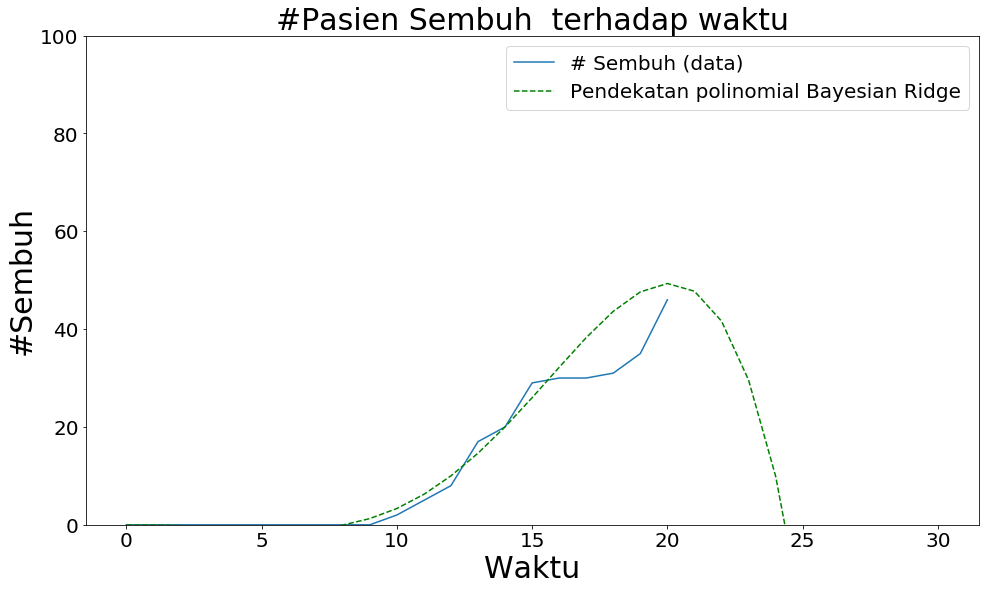

In [147]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, Indo_kasus)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='green')
plt.title('#Pasien Sembuh  terhadap waktu', size=30)
plt.xlabel('Waktu',size=30)
plt.ylabel('#Sembuh', size=30)
plt.legend(['# Sembuh (data)', 'Pendekatan polinomial Bayesian Ridge'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
ax=plt.gca()
ax.set_ylim([0,100])
plt.show()